# Email Spam Detection Project


In [4]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
pip install wordcloud


     |████████████████████████████████| 366 kB 233 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:

from sklearn.metrics import accuracy_score,fbeta_score,classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize


In [6]:

from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sudhakar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
ps = PorterStemmer()



In [9]:

msg_df = pd.read_csv('messages.csv')
msg_df.shape


(2893, 3)

In [10]:
msg_df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [11]:
msg_df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
msg_df.groupby('label').describe().T

label                                                           0  \
subject count                                                2363   
        unique                                               2193   
        top                                      sociolinguistics   
        freq                                                    8   
message count                                                2412   
        unique                                               2401   
        top     symposium on metaphor , ai and cognition = = =...   
        freq                                                    2   

label                                                           1  
subject count                                                 468  
        unique                                                420  
        top                                                  re :  
        freq                                                    7  
message count                                                 481  
        unique                                                458  
        top     this is not spam ; you are receiving this mess...  
        freq                                                    5

In [13]:
msg_df["label"].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [14]:
msg_df['length']=msg_df['message'].apply(len)
msg_df.head()


,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [15]:
msg_df.length.describe()

count     2893.000000
mean      3230.122019
std       3654.605695
min         17.000000
25%        954.000000
50%       2026.000000
75%       4039.000000
max      28649.000000
Name: length, dtype: float64

In [16]:
msg_df[msg_df['length']==910]['message'].iloc[0]

'in agreement with some of the comments posted about " of " in " coulda " ( and let \'s include hadda ) etc . , it is interesting to me that so many readers knowledgeable about linguistics see any more than a graphic convention attempting to represent the homophony of \' ve with " of " here . it leads to interesting questions about how spelling affects our " mental " lexical representations of words , as literate beings . however , it is questionable whether whatever " psychological reality " the spelling " of " in " could of " has for the literate will have any effect on the future of the language ( since that was brought up ) . i think the spelling " of " for unstressed " have " has about as much chance of making a verb of the other " of " as the spelling " we " would have of making french " oui " an english pronoun . the evolution of parentheses into phonological segments is perhaps more likely .\n'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06903bd290>,
      dtype=object)

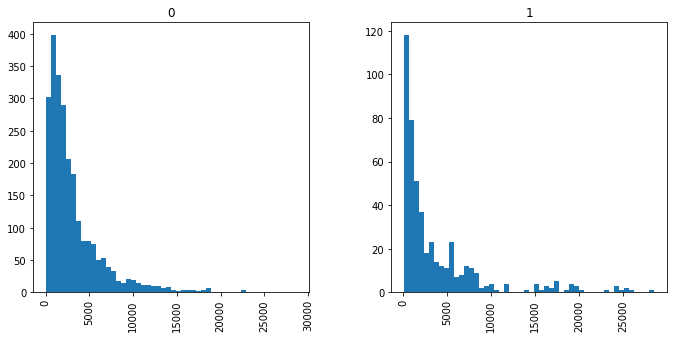

In [17]:
msg_df.hist(column='length', by='label', bins=50,figsize=(11,5))

In [18]:
import string
def cleanText(message):
    #message = message.translate(str.maketrans('ranjan', 'ranjan', string.punctuation))
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    words = [ss.stem(word) for word in message if word not in stop]
    return " ".join(words)

msg_df["message"] = msg_df["message"].apply(cleanText)
msg_df.head(n = 10)



,subject,message,label,length
0,job posting - apple-iss research center,content length appl iss research center us mil...,0,2856
1,NaN,lang classif grime joseph e barbara f grime et...,0,1800
2,query : letter frequencies for text identifica...,post inquiri sergei atama satama umabnet ab um...,0,1435
3,risk,colleagu research differ degre risk perceiv ho...,0,324
4,request book information,earlier morn phone friend mine live south amer...,0,1046
5,call for abstracts : optimality in syntactic t...,content length call paper best good enough wor...,0,4492
6,m . a . in scandinavian linguistics,scandinavian linguist univers tromso correct v...,0,2201
7,call for papers : linguistics session of the m...,call paper linguist session midwest modern lan...,0,802
8,foreign language in commercials,content length greet wonder someon identifi la...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announc pleas post dissemin list sub...,0,1478


In [25]:
spam_messages = msg_df[msg_df["label"] == 1]["message"]
ham_messages = msg_df[msg_df["label"] == 0]["message"]

In [26]:
spam_messages

21      multi part messag mime format nextpart bd ff e...
38      note wish send e mail anyon want pleas send e ...
84      releas email address plus bonus includ free st...
85      hi would like earn extra week month mail busi ...
86      realli cool premium channel pay per view event...
                              ...                        
2884    hello thank stop taken mani new pic made hot n...
2886    dear sir madam spam messag send behalf nek pla...
2887    raquel casino inc award cruis lucki member pur...
2888    hello thank stop taken mani new pic made hot n...
2889    list owner kiddin invit join mail list listbot...
Name: message, Length: 481, dtype: object

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sudhakar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word for word in word_tokenize(spamMessages)]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word for word in word_tokenize(hamMessages) ]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
2       None
3       None
4       None
        ... 
2883    None
2885    None
2890    None
2891    None
2892    None
Name: message, Length: 2412, dtype: object

In [29]:
ham_words

['content',
 'length',
 'appl',
 'iss',
 'research',
 'center',
 'us',
 'million',
 'joint',
 'ventur',
 'appl',
 'comput',
 'inc',
 'institut',
 'system',
 'scienc',
 'nation',
 'univers',
 'singapor',
 'locat',
 'singapor',
 'look',
 'senior',
 'speech',
 'scientist',
 'success',
 'candid',
 'research',
 'expertis',
 'comput',
 'linguist',
 'includ',
 'natur',
 'languag',
 'process',
 'english',
 'chines',
 'statist',
 'languag',
 'model',
 'knowledg',
 'state',
 'art',
 'corpus',
 'base',
 'n',
 'gram',
 'languag',
 'model',
 'cach',
 'languag',
 'model',
 'part',
 'speech',
 'languag',
 'model',
 'requir',
 'text',
 'speech',
 'project',
 'leader',
 'success',
 'candid',
 'research',
 'expertis',
 'expertis',
 'two',
 'follow',
 'area',
 'comput',
 'linguist',
 'includ',
 'natur',
 'languag',
 'pars',
 'lexic',
 'databas',
 'design',
 'statist',
 'languag',
 'model',
 'text',
 'token',
 'normal',
 'prosod',
 'analysi',
 'substanti',
 'knowledg',
 'phonolog',
 'syntax',
 'semant',
 

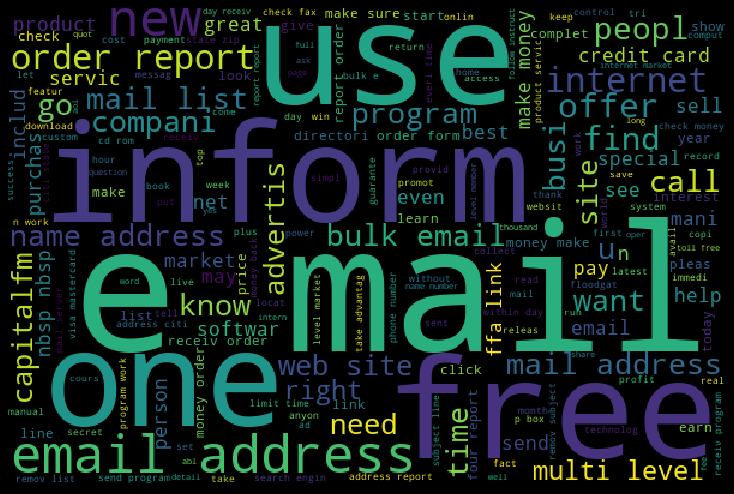

In [30]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

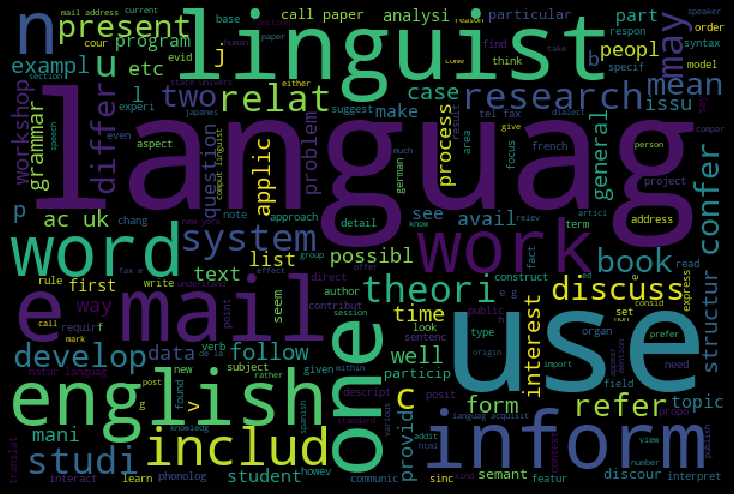

In [31]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
msg_df

,subject,message,label,length
0,job posting - apple-iss research center,content length appl iss research center us mil...,0,2856
1,NaN,lang classif grime joseph e barbara f grime et...,0,1800
2,query : letter frequencies for text identifica...,post inquiri sergei atama satama umabnet ab um...,0,1435
3,risk,colleagu research differ degre risk perceiv ho...,0,324
4,request book information,earlier morn phone friend mine live south amer...,0,1046
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thank stop taken mani new pic made hot n...,1,262
2889,you have been asked to join kiddin,list owner kiddin invit join mail list listbot...,1,2163
2890,anglicization of composers ' names,judg return post must sound like kind self pro...,0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha two separ fallaci argument n ari compar...,0,2949


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode")
features = vec.fit_transform(msg_df["message"])
print(features.shape)

(2893, 42792)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(msg_df["message"])
print (X.shape)

(2893, 42792)


In [35]:
cv = CountVectorizer()

X=cv.fit(msg_df["message"])
X.vocabulary_
X.get_feature_names()

['aa',
 'aaa',
 'aaai',
 'aaal',
 'aaarghh',
 'aabb',
 'aabyhoej',
 'aac',
 'aachen',
 'aae',
 'aafar',
 'aafk',
 'aag',
 'aaghbar',
 'aahus',
 'aaj',
 'aak',
 'aakesson',
 'aal',
 'aala',
 'aalborg',
 'aallan',
 'aam',
 'aamodt',
 'aamt',
 'aan',
 'aanbevelingen',
 'aanhalingsteken',
 'aantal',
 'aarbakk',
 'aaret',
 'aarhus',
 'aarn',
 'aarno',
 'aaron',
 'aart',
 'aat',
 'aatsp',
 'aau',
 'aav',
 'ab',
 'aba',
 'ababa',
 'aback',
 'abacus',
 'abaitua',
 'abajero',
 'abancdon',
 'abandon',
 'abarbanel',
 'abarron',
 'abaurr',
 'abb',
 'abba',
 'abbadingo',
 'abbi',
 'abbildung',
 'abbott',
 'abbreavi',
 'abbrevi',
 'abbyy',
 'abc',
 'abd',
 'abdel',
 'abdelkad',
 'abdellah',
 'abdellatif',
 'abdelmajid',
 'abdelouahab',
 'abderrahim',
 'abdesslam',
 'abdn',
 'abdomen',
 'abdu',
 'abduct',
 'abdul',
 'abdulaziz',
 'abdulfanova',
 'abdulkarim',
 'abdulla',
 'abdullah',
 'abe',
 'abeer',
 'abeil',
 'abeill',
 'abel',
 'abend',
 'abendessen',
 'aber',
 'abercrombi',
 'aberdeen',
 'aberr'

In [36]:
X = cv.fit_transform(msg_df["message"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
df = pd.DataFrame(X,columns=cv.get_feature_names())
df
df['len']=msg_df['length']
df

,aa,aaa,aaai,aaal,aaarghh,aabb,aabyhoej,aac,aachen,aae,...,zxgah,zybatov,zybatow,zygmunt,zyokyoozyu,zytkow,zz,zzlsa,zzqbhhvkcp,zzsmnzbddqtbh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
df.head()

,aa,aaa,aaai,aaal,aaarghh,aabb,aabyhoej,aac,aachen,aae,...,zxgah,zybatov,zybatow,zygmunt,zyokyoozyu,zytkow,zz,zzlsa,zzqbhhvkcp,zzsmnzbddqtbh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y=msg_df['label']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [42]:
print(accuracy_score(y_test,y_pred))
print(fbeta_score(y_test,y_pred,beta =0.5))


0.9827288428324698
0.9474671669793622


In [43]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [44]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       474
           1       0.94      0.96      0.95       105

    accuracy                           0.98       579
   macro avg       0.97      0.97      0.97       579
weighted avg       0.98      0.98      0.98       579



In [45]:
saved_model=pickle.dumps(spam_detect_model)

In [46]:
modelfrom_pickle = pickle.loads(saved_model) 

In [47]:
y_pred=modelfrom_pickle.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_pred))

0.9827288428324698


In [49]:
import joblib

In [50]:
joblib.dump(spam_detect_model,'pickle.pkl')

['pickle.pkl']

In [51]:
joblib.dump(X,'transform.pkl')

['transform.pkl']